# Market Expansion using Data Science
### Final project for the Applied Data Science Capstone Project course on Coursera (Course 10 of the IBM Data Science Professional Certificate specialization)

## Table of contents
1. [Introduction: Business Problem](#introduction)

    1.1. [Business Use-case](#usecase)

    1.2. [Task Decsription](#task)

2. [Data](#data)

    2.1. [Data Description](#datadesc)

    2.2. [Data Collection](#collection)

3. [Methodology](#methodology)

4. [Analysis](#analysis)

    4.1. [Exploartory Data Analysis](#eda)

    4.2. [Clustering Neighborhoods](#clustering)

5. [Results and Discussion](#results)

6. [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

### Business Use-case <a name="usecase"></a>

UP! Sports is a (hypothetical) retail company selling sporting goods, equipment, sports apparel, and much more, for various sporting activities, all under one roof.

Business is booming and the company has decided to expand its operations. For
the same, the company is looking to setup stores in Canada, starting with the
city of Toronto, Ontario. However, the company wants to make this decision using a strategic and methodical approach.


Acknowledging the power of data and analytics, UP! Sports has decided to use a data science based approach to support their decision-making process for business expansion.

### Task Description <a name="task"></a>

The task is to identify and group neighborhoods in the city of Toronto, Ontario that the company must target and setup their operations and stores in. Since the company specializes in sports-related consumer goods, the ideal neighborhood(s) or groups of neighborhoods for the company would be neighborhoods with many sport-related facilities, such as gyms, yoga classes, soccer fields, and so on.

Thus, the task is to identify such neighborhoods and present an analysis, outlining which neighborhood(s) should UP! Sports setup their retail stores in, as well as the rationale behind the same.

## Data <a name="data"></a>

### Data Description <a name="datadesc"></a>

The data that will be used for this business use-case is location data for neighborhoods in Toronto, Ontario, Canada. This data will be collected through Wikipedia, along with the Foursquare API.

The Wikipedia page "List of postal codes of Canada: M" gives details and list of all postal codes in Toronto, Ontario.

[List of postal Codes of Canada: M](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

Therefore, data for all neighborhoods in Toronto, including their names, respective boroughs and postal codes will be collected from Wikipedia by web scraping.

Further, data about all different venues in each neighborhood will be collected using the Foursquare Places API, using latitude and longitude values, which will be collected using geospatial data.


The final data will include the following:
1. Neighborhood name
2. Borough name
3. Postal Code
4. Latitude and longitude values
5. Venues in each neighborhood

This data will be analyzed to provide a solution to the discussed business problem.

### Data Collection <a name="collection"></a>

In [1]:
# For getting Wikipedia page from URL through get request
import requests

# For scraping information from the HTML source
from bs4 import BeautifulSoup

# To create the DataFrame for neighborhood data
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For handling arrays and vectors
import numpy as np

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In the following code cell,  data is scraped from the Wikipedia page titled 'List of postal codes of Canada: M'. The scraped web page is transformed into a Pandas DataFrame.

In [2]:
# Get the HTML source
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(source.text, 'lxml')

# Initialise empty list to store table contents
table_contents = []

# Scrape all information in the HTML 'table' tag
table = soup.find('table')
# Scrape information in table rows i.e., HTML 'td' tag
for row in table.findAll('td'):
    # Store record of DataFrame
    cell = {}
    # Drop record if borough is 'Not assigned'
    if row.span.text=='Not assigned':
        pass
    else:
        # Add PostalCode, Borough and Neighborhood to record
        cell['Postal Code'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# Create Pandas DataFrame
toronto_DF = pd.DataFrame(table_contents)

# Replace Borough values with appropriate name
toronto_DF['Borough'] = toronto_DF['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto', 
                                                     'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business', 
                                                     'EtobicokeNorthwest':'Etobicoke Northwest',
                                                     'East YorkEast Toronto':'East York/East Toronto', 
                                                     'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

# Number of neighborhods in Toronto
print('There are {} neighborhoods in Toronto, Ontario.\n'.format(toronto_DF.shape[0]))

# Diaplay first 10 records
toronto_DF.head(10)

There are 103 neighborhoods in Toronto, Ontario.



,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


Finally, here I have added the columns for latitude and longitude values by joining the DataFrame created above with the Geospatial dataset.

In [3]:
# Get geospatial data for latitue and longitude values
geospatial_data = pd.read_csv('Geospatial_Coordinates.csv')

# Join DataFrame with geospatial DataFrame to get columns for latitude and longitue of each neighborhoopd
toronto_DF = toronto_DF.join(geospatial_data.set_index('Postal Code'), on='Postal Code')

# Display first 10 records
toronto_DF.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In the following code cell, I have used geopy to get the coordinates for Toronto using reverse geocoding.

In [4]:
# # To get latitude and longitude values for given address
from geopy.geocoders import Nominatim

# Create a Nominatim object for geolocation
geolocator = Nominatim(user_agent="ny_explorer")

# Get latitue and longitude values for Toronto
location = geolocator.geocode('Toronto')
tor_lat = location.latitude
tor_lon = location.longitude

# Display latitude and longitude values for Toronto
print('The geograpical coordinates of Toronto are {}, {}.'.format(tor_lat, tor_lon))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


Next, I have created a map for Toronto using folium. I have highlighted the different neighborhoods scraped in the previous few code cells.

In [5]:
# To plot interactive maps
import folium

# Matplotlib and associated packages
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Create map of Toronto using latitude and longitude values
toronto_map = folium.Map(location=[tor_lat, tor_lon], zoom_start=11)

# List of all boroughs
boroughs = list(toronto_DF['Borough'].unique())

# Set colour scheme for boroughs
colors_array = cm.rainbow(np.linspace(0, 1, len(boroughs)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to map
for lat, lon, borough, neighborhood in zip(toronto_DF['Latitude'], toronto_DF['Longitude'], toronto_DF['Borough'], toronto_DF['Neighborhood']):
    label = 'Neighborhood: {}\nBorough: {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lon], 
                        radius=5, 
                        popup=label, 
                        color=rainbow[boroughs.index(borough)], 
                        fill=True, 
                        fill_color='#3186cc', 
                        fill_opacity=0.7, 
                        parse_html=False).add_to(toronto_map)  

# Display map for Toronto   
toronto_map

Next, the Foursquare API is used to get data about venues near each neighborhood in Toronto. For this, the Foursquare API needs to be configured with the client ID and client secret.

In [6]:
# Your Foursqaure API Client ID
CLIENT_ID = 'YOUR-FOURSQUARE-CLIENT-ID'

# Your Foursquare API CLient secret
CLIENT_SECRET = 'YOUR-FOURSQUARE-CLIENT-SECRET'

# Foursquare API version
VERSION = '20180604'

LIMIT = 100
radius = 500

# URL for getting data from Foursquare API
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, tor_lat, tor_lon, VERSION, radius, LIMIT)

In the next 2 code cells, I have gathered data about venues in and around Toronto, along with all related information for the venues, through the Foursquare API.

Finally, I have created a DataFrame that stores details about various different venues in the different neighborhoods of Toronto, along with their coordinates and venue types (catageories).

In [7]:
# Function to get nearby venues
def getNearbyVenues(boroughs, neighborhoods, latitudes, longitudes, radius=500):
    venues_list=[]
    for borough, neighborhood, lat, lng in zip(boroughs, neighborhoods, latitudes, longitudes):
        # URL to get data about venues from Foursquare API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)   
        
        # Get data through get request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Add results to list of all venues
        venues_list.append([(borough, neighborhood, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    # Create DataFrame for nearby venues
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 'Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    # Return DataFrame of nearby venues
    return(nearby_venues)

In [8]:
# Get nearby venues for Toronto
toronto_venues = getNearbyVenues(boroughs=toronto_DF['Borough'], neighborhoods=toronto_DF['Neighborhood'], latitudes=toronto_DF['Latitude'], longitudes=toronto_DF['Longitude'])

# Print number of nearby venues returned
print('Foursquare retured {} nearby venues for Toronto.'.format(toronto_venues.shape[0]))

# Print number of unique venue categories
print('There are {} uniques categories of venues.\n'.format(len(toronto_venues['Venue Category'].unique())))

# Display first 10 records for nearby venues for Toronto
toronto_venues.head(10)

Foursquare retured 1997 nearby venues for Toronto.
There are 262 uniques categories of venues.



,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
1,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,North York,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,North York,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
4,North York,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
5,North York,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
6,North York,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
7,North York,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
8,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
9,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery


## Methodology <a name="methodology"></a>

To solve the problem at hand, neighborhoods and boroughs that have a **high density of sports related venues**, such as gyms, stadiums, etc., have to be identified.

To do this, we have already collected the required data, through web scraping and through the Foursquare API.

The first step of the analysis involves filtering the collected data to **include only those venues that are related to sporting activities.**

After filtering out such venues, some basic **exploratory analysis** is done to get more insight on the available data. This involves plotting some charts and maps to visualize the data. Through these visualizations, we will be able to **identify the boroughs that have a high density of sports related venues.**

Finally, **the selected venues are clustered** to identify cluster centers, which will become the **target locations** for the company. For this, **k-means clustering algorithm** is used.

## Analysis <a name="analysis"></a>

### Exploratory Data Analysis <a name="eda"></a>

Since we are only interested in venues related to sporting activities, such as gyms, yoga classes, etc., I have filtered the DataFrame for venues in and around Toronto to include only such venues.

In [9]:
# List of required venue types
venue_categories = ['Athletics & Sports', 'Baseball Field', 'Baseball Stadium', 'Basketball Court', 'Basketball Stadium',
                    'Beach', 'Climbing Gym', 'College Gym', 'College Rec Center', 'College Stadium',
                    'Curling Ice', 'Field', 'Golf Course', 'Gym', 'Gym / Fitness Center',
                    'Gym Pool', 'Hockey Arena', 'Martial Arts School', 'Park', 'Playground',
                    'Pool', 'Skate Park', 'Skating Rink', 'Soccer Field', 'Sporting Goods Shop',
                    'Sports Bar', 'Stadium', 'Supplement Shop', 'Swim School', 'Tennis Court', 'Yoga Studio']

# Filter toronto_venues DataFrame
toronto_sports_venues = toronto_venues[toronto_venues['Venue Category'].isin(venue_categories)].reset_index()
toronto_sports_venues.drop(['index'], axis=1, inplace=True)

# Print number of sports venues
print('There are {} sports related venues in and around Toronto.\n'.format(toronto_sports_venues.shape[0]))

# Display first 10 records
toronto_sports_venues.head(10)

There are 168 sports related venues in and around Toronto.



,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,North York,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Parliament Square Park,43.650264,-79.362195,Park
3,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Underpass Park,43.655764,-79.354806,Park
4,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,43.655618,-79.356211,Park
5,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,Queen's Park,43.663946,-79.392180,Park
6,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
7,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,Hart House Gym,43.664172,-79.394888,Gym
8,North York,Don Mills North,43.745906,-79.352188,LA Fitness,43.747665,-79.347077,Gym
9,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center


Here, I have plotted a horizontal bar chart showing the number of sports related venues in each borough.

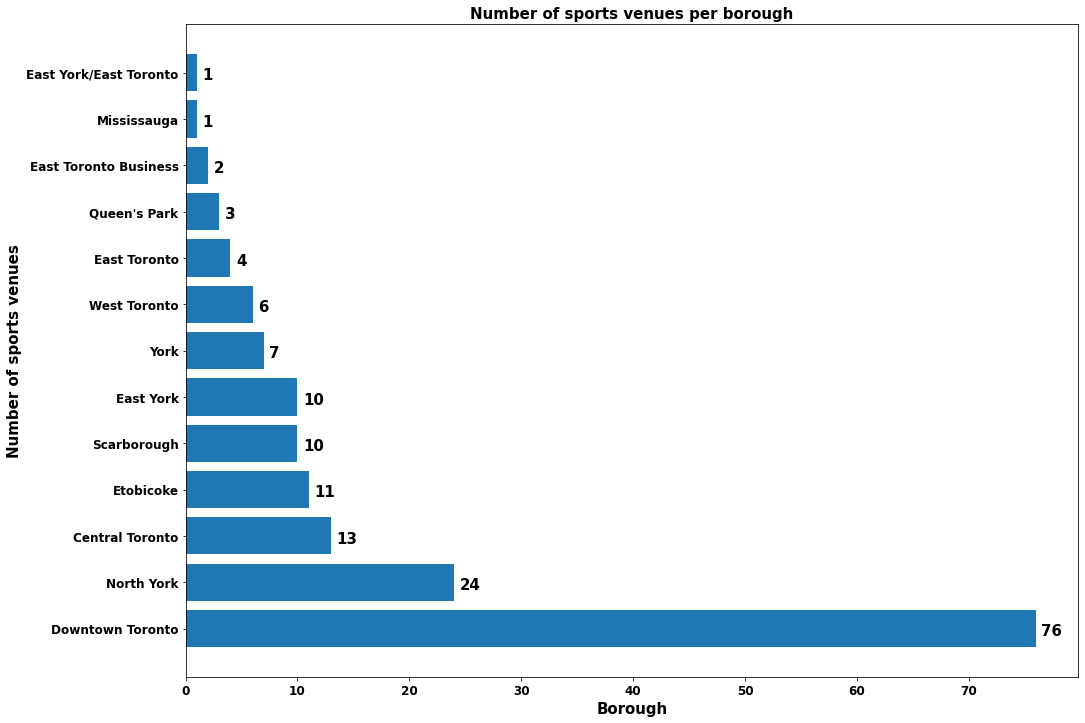

In [10]:
boroughs = toronto_sports_venues.groupby('Borough').count().Venue.sort_values(ascending=False).reset_index()
x = list(boroughs['Borough'])
y = list(boroughs['Venue'])
plt.figure(figsize=(16, 12))
plt.barh(x, y)
plt.title('Number of sports venues per borough', fontdict=dict(fontsize=15), fontweight="bold")
plt.xlabel('Borough', fontdict=dict(fontsize=15), fontweight="bold")
plt.ylabel('Number of sports venues', fontdict=dict(fontsize=15), fontweight="bold")
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(y):
    plt.text(v+0.5, i-0.15, str(v), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

By far, Downtown Toronto has the greatest number of sports related venues (76).

North York ranks 2nd in terms of the number of sports venues in the borough. However, these venues are scattered around North York i.e., the density of sports related venues in North York is quite low (see map in next code cell).

Targeting neighborhoods in Downtown Toronto can be a great starting point for the company to set up their first store in Toronto, Ontario.

Further, let's take a look at a map of Toronto showing the different sports venues, based on the data collected so far.

In [11]:
# Create map of Toronto using latitude and longitude values
toronto_sports_map = folium.Map(location=[tor_lat, tor_lon], zoom_start=11)

# List of all boroughs
boroughs = list(toronto_DF['Borough'].unique())

# Set colour scheme for boroughs
colors_array = cm.rainbow(np.linspace(0, 1, len(boroughs)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to map
for lat, lon, venue, category, borough, neighborhood in zip(toronto_sports_venues['Venue Latitude'], toronto_sports_venues['Venue Longitude'], toronto_sports_venues['Venue'], toronto_sports_venues['Venue Category'], toronto_sports_venues['Borough'], toronto_sports_venues['Neighborhood']):
    label = 'Venue Name: {}\nVenue Category: {}\nNeighborhood: {}\nBorough: {}'.format(venue, category, neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lon], 
                        radius=5, 
                        popup=label, 
                        color=rainbow[boroughs.index(borough)], 
                        fill=True, 
                        fill_color='#3186cc', 
                        fill_opacity=0.7, 
                        parse_html=False).add_to(toronto_sports_map)  

# Display the map for sports venues in and around Toronto   
toronto_sports_map

As expected, a lot of the sports venues are located close to each other in the borough of Downtown Toronto (as shown on the map in dark blue colour).

A considerably high density of sports related venues is also observed in the surrounding boroughs of Central Toronto, East Toronto, East Toronto Business, West Toronto and East York.

### Clustering Neighborhoods <a name="clustering"></a>

For further analysis, let's narrow down our focus to these selected boroughs having a high density of sports related venues and find some suitable neighborhoods in these boroughs.

To select suitable neighborhoods in these boroughs, I have performed clustering based on the latitude and longitude values of each neighborhood. The cluster centroids will then correspond to the required suitable neighborhoods.

In [12]:
# List of selected boroughs
selected_boroughs = ['Downtown Toronto', 'Central Toronto', 'East Toronto', 'East Toronto Business', 'West Toronto', 'East York']

# Filter DataFrame for sports venues for selected boroughs only
toronto_sports_venues_filtered = toronto_sports_venues[toronto_sports_venues['Borough'].isin(selected_boroughs)]

# Keep only required columns
cols = ['Borough', 'Neighborhood', 'Venue', 'Venue Latitude', 'Venue Longitude']
toronto_sports_venues_filtered = toronto_sports_venues_filtered[cols].reset_index()
toronto_sports_venues_filtered.drop(['index'], axis=1, inplace=True)
toronto_sports_venues_filtered.head(10)

,Borough,Neighborhood,Venue,Venue Latitude,Venue Longitude
0,Downtown Toronto,"Regent Park, Harbourfront",Parliament Square Park,43.650264,-79.362195
1,Downtown Toronto,"Regent Park, Harbourfront",Underpass Park,43.655764,-79.354806
2,Downtown Toronto,"Regent Park, Harbourfront",Corktown Common,43.655618,-79.356211
3,East York,"Parkview Hill, Woodbine Gardens",East York Gymnastics,43.710654,-79.309279
4,East York,"Parkview Hill, Woodbine Gardens",TKTO - Toronto Knife Throwing Organization,43.709966,-79.313411
5,Downtown Toronto,"Garden District, Ryerson",College Park Area,43.659453,-79.383785
6,Downtown Toronto,"Garden District, Ryerson",Ryerson Athletics Centre,43.658434,-79.379296
7,East York,Woodbine Heights,East York Memorial Arena,43.697224,-79.315397
8,East York,Woodbine Heights,East York Memorial Arena,43.697624,-79.315145
9,East York,Woodbine Heights,Stan Wadlow Park,43.697836,-79.314303


Next, I have clustered the venues into 4 clusters based on the venue coordinates using k-means clustering algorithm.

In [13]:
# For k-means clustering
from sklearn.cluster import KMeans

# Set number of clusters
kclusters = 4

# DataFrame with data for clustering
toronto_sports_clustering = toronto_sports_venues_filtered[['Venue Latitude', 'Venue Longitude']]

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_sports_clustering)

# Add cluster labels
toronto_sports_venues_clustered = toronto_sports_venues_filtered
toronto_sports_venues_clustered.insert(loc=5, column='Cluster Labels', value=kmeans.labels_)

Let's now plot the clustered venues using folium.

In [14]:
# Plotting map
map_clusters = folium.Map(location=[tor_lat, tor_lon], zoom_start=12)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_sports_venues_clustered['Venue Latitude'], toronto_sports_venues_clustered['Venue Longitude'], toronto_sports_venues_clustered['Neighborhood'], toronto_sports_venues_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], 
                        radius=5, 
                        popup=label, 
                        color=tab10[int(cluster)], 
                        fill=True, 
                        fill_color=tab10[int(cluster)], 
                        fill_opacity=1.0).add_to(map_clusters)

# Display map with clusters
map_clusters

The following code cell creates a DataFrame to store the details about the cluster centers identified using k-means clustering performed above. It includes the latitude and longitude of the target location (cluster center), as well as the address.

In [15]:
# Coordinates of cluster centers
latitudes, longitudes, addresses = [], [], []
for center in kmeans.cluster_centers_:
    latitudes.append(center[0])
    longitudes.append(center[1])
    location = geolocator.reverse("{}, {}".format(center[0], center[1]))
    addresses.append(location.address)

# Create DataFrame
selected_locations = pd.DataFrame({'Latitude':latitudes, 'Longitude':longitudes, 'Address':addresses})
selected_locations

,Latitude,Longitude,Address
0,43.653015,-79.420226,"382, Shaw Street, University—Rosedale, Old Tor..."
1,43.685021,-79.318302,"12, Glebemount Avenue, Danforth Village, Beach..."
2,43.705705,-79.381586,"357, Manor Road East, Davisville, Don Valley W..."
3,43.649740,-79.378798,"Tim Hortons, Grand Opera Lane, King East, Toro..."


Let's plot these target location on a map to visualize the options.

In [16]:
# Plotting map
selected_locations_map = folium.Map(location=[tor_lat, tor_lon], zoom_start=12)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
tab10 = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, addr in zip(selected_locations['Latitude'], selected_locations['Longitude'], selected_locations['Address']):
    label = folium.Popup('Address: ' + addr, parse_html=True)
    folium.CircleMarker([lat, lon], 
                        radius=5, 
                        popup=label, 
                        color=tab10[1], 
                        fill=True, 
                        fill_color=tab10[1], 
                        fill_opacity=1.0).add_to(selected_locations_map)

# Display map with clusters
selected_locations_map

## Results and Discussion <a name="results"></a>

Our analysis shows that there are **168 sports related venues** in and around Toronto, Ontario, located in **103 neighborhoods.**

A high density of such venues is observed in **Downtown Toronto** as well as the surrounding boroughs of **East Toronto, East Toronto Business, Central Toronto, West Toronto, and East York.**

Upon grouping these venues into 4 different clusters, we have identified 4 locations that the company can target in order to setup their first retail store in Toronto, Ontario, Canada.

These locations are:

1. 382, Shaw Street, University—Rosedale, Old Toronto, Toronto, Golden Horseshoe, Ontario, M6G 1C5, Canada

2. 12, Glebemount Avenue, Danforth Village, Beaches—East York, Old Toronto, Toronto, Golden Horseshoe, Ontario, M4C 1K9, Canada

3. 357, Manor Road East, Davisville, Don Valley West, Old Toronto, Toronto, Golden Horseshoe, Ontario, M4S 1S3, Canada

4. Tim Hortons, Grand Opera Lane, King East, Toronto Centre, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5H, Canada

Therefore, the results of our analysis provide valuable information to the company which can be used to solve the problem at hand.

## Conclusion <a name="conclusion"></a>

Hence, we have successfully identified 4 prime locations that can be targetted by UP! Sports as locations to setup their first retail store in Toronto, Ontario, Canada.